1. Import libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data

df_ords_merged = pd.read_pickle(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_updated_2.pkl')

<Axes: >

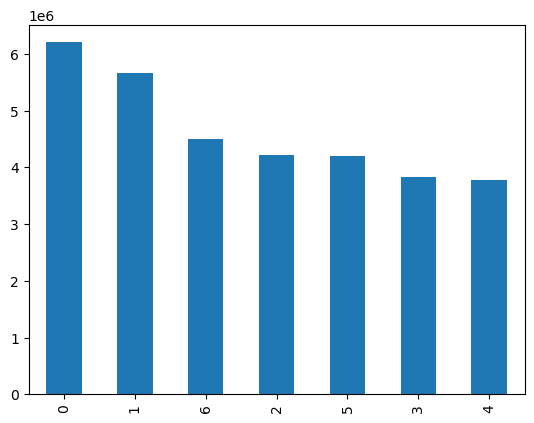

In [4]:
#bar chart
df_ords_merged['order_day_of_week'].value_counts().plot.bar()

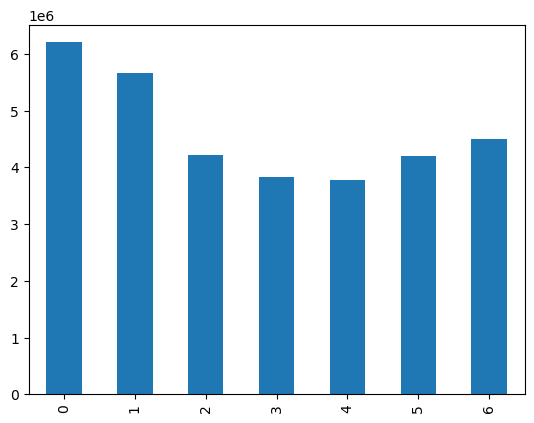

In [7]:
bar = df_ords_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

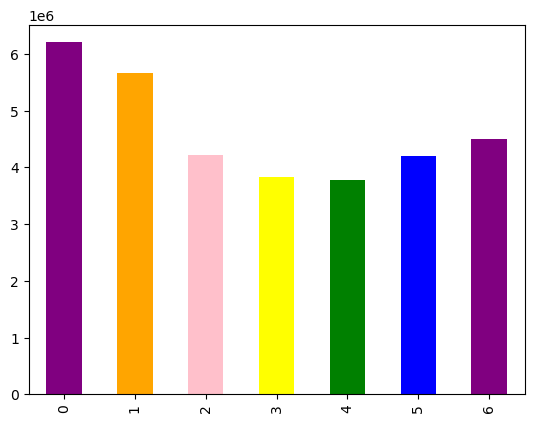

In [8]:
bar = df_ords_merged['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','orange','pink','yellow','green','blue'])

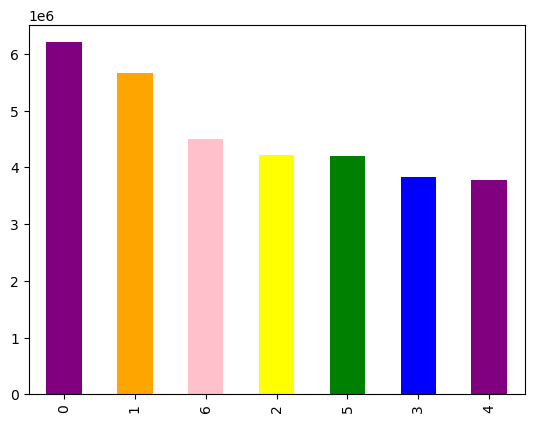

In [9]:
bar = df_ords_merged['order_day_of_week'].value_counts().plot.bar(color =['purple', 'orange', 'pink', 'yellow', 'green', 'blue'])

In [11]:
bar.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/bar_orders_dow.png')

<Axes: ylabel='Frequency'>

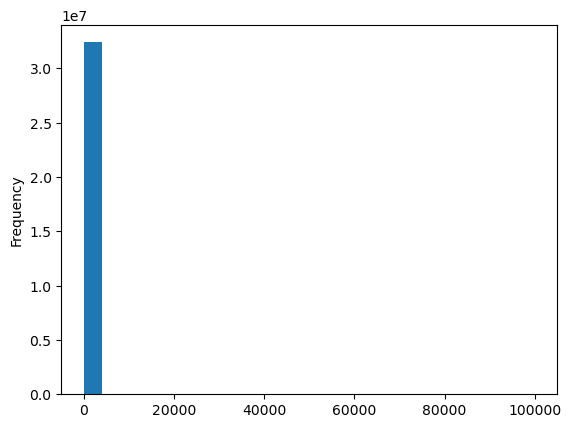

In [12]:
#histograms

df_ords_merged['prices'].plot.hist(bins = 25)

In [13]:
df_ords_merged['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

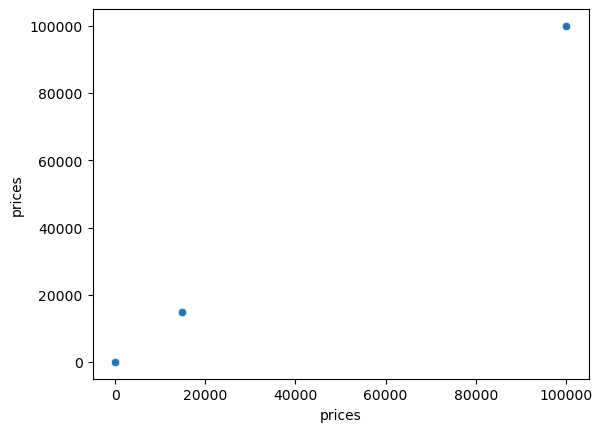

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_merged)

In [15]:
df_ords_merged.loc[df_ords_merged['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
10030345,171,171,912404,17,prior,12,2,14,5.0,21553,...,High-range product,Regularly busy,Regularly days,Most orders,40,Regular customer,108.65,High spender,5.0,Frequent customer
10030346,181,181,603376,17,prior,22,6,16,4.0,21553,...,High-range product,Regularly busy,Regularly days,Average orders,40,Regular customer,108.65,High spender,5.0,Frequent customer
10030347,1944,1944,3264360,135,prior,2,2,21,13.0,21553,...,High-range product,Regularly busy,Regularly days,Average orders,4,New customer,1154.79,High spender,12.0,Regular customer
10030348,1945,1945,892534,135,prior,3,0,8,12.0,21553,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.79,High spender,12.0,Regular customer
10030349,5708,5708,229704,342,prior,8,1,19,30.0,21553,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.43,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29167287,3386542,3386542,2249946,204099,prior,29,0,8,4.0,33664,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.74,High spender,4.0,Frequent customer
29167288,3386544,3386544,2363282,204099,prior,31,0,9,2.0,33664,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.74,High spender,4.0,Frequent customer
29167289,3391313,3391313,3181945,204395,prior,13,3,15,8.0,33664,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.15,High spender,5.0,Frequent customer
29167290,3405096,3405096,2486215,205227,prior,7,3,20,4.0,33664,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.38,High spender,12.0,Regular customer


In [16]:
df_ords_merged.loc[df_ords_merged['prices'] >100, 'prices'] = np.nan

In [17]:
df_ords_merged['prices'].max()

25.0

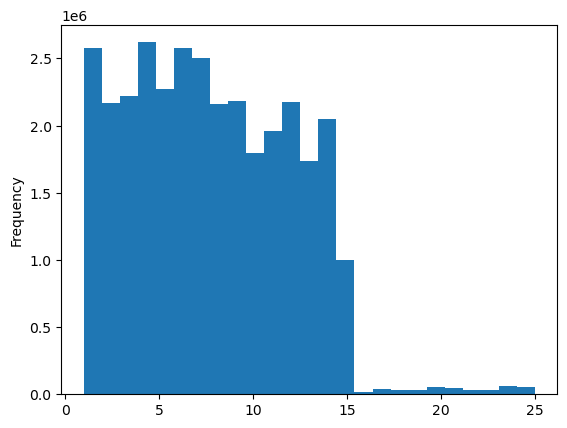

In [18]:
hist = df_ords_merged['prices'].plot.hist(bins = 25)

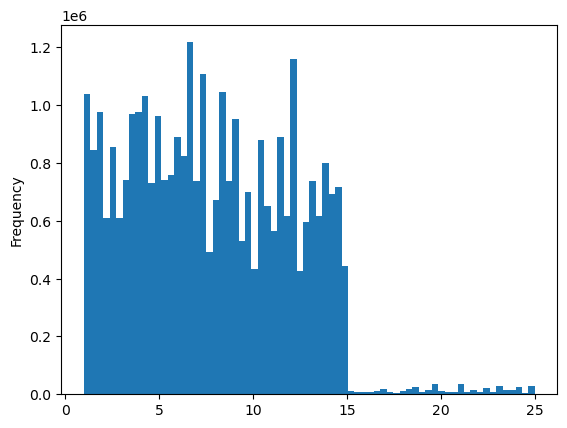

In [19]:
hist_2 = df_ords_merged['prices'].plot.hist(bins = 70)

In [20]:
hist.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/hist_orders_dow.png')


In [21]:
#sampling data

np.random.seed(4)
dev = np.random.rand(len(df_ords_merged)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [25]:
#store 70% of the sample in the dataframe big
big = df_ords_merged[dev]

In [26]:
#store 30% of the sample in the dataframe small
small =  df_ords_merged[~dev]

In [27]:
len(df_ords_merged)

32406041

In [28]:
len(big) + len(small)

32406041

In [29]:
df_2 = small[['order_day_of_week','prices']]

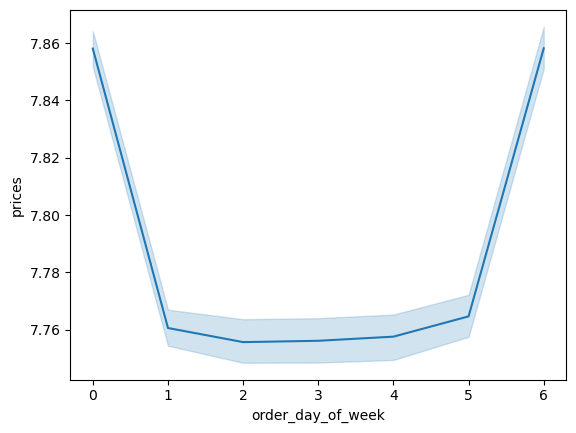

In [30]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [31]:
line.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/line_orders_dow.png')